In [380]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassPredictionError, DiscriminationThreshold, ClassBalance, ROCAUC,ClassificationReport
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
%matplotlib inline


In [381]:
pd.set_option('display.max_columns', 150)

In [382]:
os.chdir('/Users/ajakaiye/Documents/data')

In [383]:
carvan_train = pd.read_csv('carvan_train.csv')
carvan_test = pd.read_csv('carvan_test.csv')

In [384]:
carvan_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [385]:
carvan_test.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
3995,33,1,2,4,8,0,7,2,0,5,2,2,2,6,2,0,3,6,5,0,0,1,0,4,2,0,2,4,2,4,5,4,4,2,3,6,3,6,0,0,0,2,3,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,2,4,4,4,2,2,4,4,2,0,0,3,3,3,1,1,2,5,1,7,2,6,0,3,7,2,3,3,2,2,0,4,2,0,0,0,6,0,0,0,0,0,0,0,6,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3997,36,1,2,3,8,1,5,1,3,7,0,2,2,5,3,2,3,4,2,0,0,3,4,2,1,1,3,5,0,7,2,6,1,2,6,3,2,5,3,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3998,33,1,3,3,8,1,4,2,3,7,1,2,2,3,4,1,3,5,1,1,1,2,3,3,2,2,2,4,1,4,5,6,2,2,7,2,1,4,4,1,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3999,8,1,2,3,2,4,3,0,3,5,2,2,0,6,3,8,0,1,8,0,0,0,0,1,4,0,5,1,0,2,7,9,0,0,2,7,0,0,7,2,0,7,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [386]:
caty = carvan_train.loc[:,['V1','V5']]

In [387]:
for i in range(len(caty.index)):
    if caty['V1'][i] in [1,3,6]:
        caty.loc[i,'V1'] = 136
    if caty['V1'][i] in [2,7,13,38]:
        caty.loc[i,'V1'] = 271338
    if caty['V1'][i] in [4,5,9,22,35]:
        caty.loc[i,'V1'] = 4592235
    if caty['V1'][i] in [10,34]:
        caty.loc[i,'V1'] = 1034
    if caty['V1'][i] in [11,32,39]:
        caty.loc[i,'V1'] = 113239
    if caty['V1'][i] in [15, 16, 17, 18, 19,21,28,40]:
        caty.loc[i,'V1'] = 1516171819212840
    if caty['V1'][i] in [23,25,26,27,29,41]:
        caty.loc[i,'V1'] = 232526272941
    if caty['V1'][i] in [24,30]:
        caty.loc[i,'V1'] = 2430
    if caty['V1'][i] in [20,37]:
        caty.loc[i, 'V1'] = 2037

In [388]:
#do same for test data set
catest = carvan_test.loc[:,['V1','V5']]

In [389]:
for i in range(len(catest.index)):
    if catest['V1'][i] in [1,3,6]:
        catest.loc[i,'V1'] = 136
    if catest['V1'][i] in [2,7,13,38]:
        catest.loc[i,'V1'] = 271338
    if catest['V1'][i] in [4,5,9,22,35]:
        catest.loc[i,'V1'] = 4592235
    if catest['V1'][i] in [10,34]:
        catest.loc[i,'V1'] = 1034
    if catest['V1'][i] in [11,32,39]:
        catest.loc[i,'V1'] = 113239
    if catest['V1'][i] in [15, 16, 17, 18, 19,21,28,40]:
        catest.loc[i,'V1'] = 1516171819212840
    if catest['V1'][i] in [23,25,26,27,29,41]:
        catest.loc[i,'V1'] = 232526272941
    if catest['V1'][i] in [24,30]:
        catest.loc[i,'V1'] = 2430
    if catest['V1'][i] in [20,37]:
        catest.loc[i, 'V1'] = 2037

In [390]:
v1col = pd.get_dummies(caty['V1'],prefix='V1')
v5col = pd.get_dummies(caty['V5'], prefix='V5')

In [391]:
v1col.drop(['V1_1516171819212840','V1_232526272941'],1, inplace= True)

In [392]:
#do same for test data set
v1col_test = pd.get_dummies(catest['V1'],prefix='V1')
v5col_test = pd.get_dummies(catest['V5'], prefix='V5')
                            


In [393]:
v1col_test.drop(['V1_232526272941','V1_1516171819212840'],1,inplace=True)

In [394]:
batch2_train = carvan_train.loc[:,['V4','V6','V44']]

In [395]:
batch2_test = carvan_test.loc[:,['V4','V6','V44']]

In [396]:
#train data for v4
for i in range(len(batch2_train.index)):
    if batch2_train['V4'][i] in [2,3,4,5]:
        batch2_train.loc[i,'V4'] = 2345
    if batch2_train['V6'][i] in [1,2]:
        batch2_train.loc[i,'V6'] = 12
    if batch2_train['V6'][i] in [7,8,9]:
        batch2_train.loc[i,'V6'] = 789
    if batch2_train['V44'][i] in [0,1]:
        batch2_train.loc[i,'V44'] = 1

In [397]:
#for test for v4
for i in range(len(batch2_test.index)):
    if batch2_test['V4'][i] in [2,3,4,5]:
        batch2_test.loc[i,'V4'] = 2345
    if batch2_test['V6'][i] in [1,2]:
        batch2_test.loc[i,'V6'] = 12
    if batch2_test['V6'][i] in [7,8,9]:
        batch2_test.loc[i,'V6'] = 789
    if batch2_test['V44'][i] in [0,1]:
        batch2_test.loc[i,'V44'] = 1

In [398]:
v4col_train = pd.get_dummies(batch2_train['V4'],prefix='V4')
v6col_train = pd.get_dummies(batch2_train['V6'],prefix='V6')
v44col_train = pd.get_dummies(batch2_train['V44'],prefix='V44')

In [399]:
v4col_test = pd.get_dummies(batch2_test['V4'], prefix='V41')
v6col_test = pd.get_dummies(batch2_test['V6'], prefix='V62')
v44col_test = pd.get_dummies(batch2_test['V44'], prefix='V443')

In [400]:
v44col_train

,V44_1,V44_2,V44_3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5817,0,1,0
5818,1,0,0
5819,0,1,0
5820,1,0,0


In [401]:
v4col_test.drop(['V41_6'],1,inplace=True)

In [402]:
v4col_train.drop(['V4_1'],1,inplace=True)

In [403]:
v6col_test.drop(['V62_4'],1,inplace=True)

In [404]:
v44col_test.drop(['V443_1'],1,inplace=True)

In [405]:
v6col_train.drop(['V6_3'],1,inplace=True)

In [406]:
v44col_train.drop(['V44_3'],1, inplace=True)

In [407]:
v5col.drop(['V5_2'],1, inplace=True)

In [408]:
v5col_test.drop(['V5_2'],1, inplace=True)

In [409]:
train_data = pd.concat([carvan_train,v5col,v1col, v44col_train,v4col_train,v6col_train], 1)
test_data = pd.concat([carvan_test,v5col_test, v1col_test, v44col_test,v4col_test,v6col_test],1)

In [410]:
#get another version of data
train_data2 = pd.concat([carvan_train,v5col,v1col], 1)
test_data2 = pd.concat([carvan_test,v5col_test, v1col_test],1)

In [411]:
train_data3 = carvan_train
test_data3 = carvan_test

In [412]:
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V5_1,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9,V5_10,V1_8,V1_12,V1_31,V1_33,V1_36,V1_136,V1_1034,V1_2037,V1_2430,V1_113239,V1_271338,V1_4592235,V44_1,V44_2,V4_6,V4_2345,V6_0,V6_4,V6_5,V6_6,V6_12,V6_789
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [413]:
test_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V5_1,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9,V5_10,V1_8,V1_12,V1_31,V1_33,V1_36,V1_136,V1_1034,V1_2037,V1_2430,V1_113239,V1_271338,V1_4592235,V443_2,V443_3,V41_1,V41_2345,V62_0,V62_3,V62_5,V62_6,V62_12,V62_789
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0


In [414]:
train_data2.shape, test_data2.shape

((5822, 107), (4000, 106))

In [415]:
train_data3.shape, test_data3.shape

((5822, 86), (4000, 85))

In [416]:
test_data.shape, train_data.shape

((4000, 116), (5822, 117))

In [417]:
#next delete useless columns: V1,V5,V6,V4,V44 from test and train data set
test_data.drop(['V1','V5','V6','V4','V44'], 1, inplace=True)
train_data.drop(['V1','V5','V6','V4','V44'], 1, inplace=True)

In [418]:
#check shape
test_data.shape, train_data.shape

((4000, 111), (5822, 112))

In [419]:
#take out the target away from train data set
policy_target = train_data['V86']
train_data.drop(['V86'],1,inplace=True)


In [420]:
policy_target

0       0
1       0
2       0
3       0
4       0
       ..
5817    0
5818    0
5819    1
5820    0
5821    0
Name: V86, Length: 5822, dtype: int64

In [421]:
#second version
test_data2.drop(['V1','V5'], 1, inplace=True)
train_data2.drop(['V1','V5'], 1, inplace=True)

In [422]:
test_data2.shape, train_data2.shape

((4000, 104), (5822, 105))

In [423]:
#third version
train_data3.shape, test_data3.shape

((5822, 86), (4000, 85))

In [424]:
policy_target2 = train_data2['V86']
train_data2.drop(['V86'],1,inplace=True)


In [425]:
policy_target3 = train_data3['V86']
train_data3.drop(['V86'],1,inplace=True)


In [426]:
#split the train data set so as to evaluate our model properly
X_train, x_test, y_train, y_test = train_test_split(train_data, policy_target, test_size = 0.33, stratify = policy_target, random_state = 42)

In [427]:
#second version
X_train2, x_test2, y_train2, y_test2 = train_test_split(train_data2, policy_target2, test_size = 0.33, stratify = policy_target2, random_state = 42)

In [428]:
X_train3, x_test3, y_train3, y_test3 = train_test_split(train_data3, policy_target3, test_size = 0.33, stratify = policy_target3, random_state = 42)

In [429]:
X_train.shape, x_test.shape

((3900, 111), (1922, 111))

In [430]:
X_train2.shape, x_test2.shape

((3900, 104), (1922, 104))

In [431]:
X_train3.shape, x_test3.shape

((3900, 85), (1922, 85))

In [432]:
#method = SMOTE()

In [433]:
#get score function
def cust_score(y_true, y_pred):
    foo_score = fbeta_score(y_true, y_pred, beta=2.0)
    return foo_score
beta_score = make_scorer(cust_score,greater_is_better= True)
#get a kfold number
strk = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

In [434]:
#first version
X_train = X_train.as_matrix()
y_train = y_train.values.ravel()
x_test = x_test.as_matrix()
#2nd version
X_train2 = X_train2.as_matrix()
y_train2 = y_train2.values.ravel()
x_test2 = x_test2.as_matrix()
#third version
X_train3 = X_train3.as_matrix()
y_train3 = y_train3.values.ravel()
x_test3 = x_test3.as_matrix()

In [439]:
#include the various versions
X_variant = [X_train, X_train2, X_train3]
X_names = ['X with all categorical values transformed', 'X with just v1 & v5 transform', 'X with all categorical values left untransformed']

for train_x,x_name in zip(X_variant, X_names):
    print('Data:', x_name)
    svc = SVC()
    svc_scores = cross_val_score(svc, train_x, y_train, cv=strk, scoring=beta_score)
    print('Mean Fbeta 2 score - SVC', svc_scores.mean())
    
    decision_tree = DecisionTreeClassifier(max_leaf_nodes=4, class_weight='balanced')
    decision_tree_score = cross_val_score(decision_tree, train_x, y_train, cv=strk, scoring=beta_score)
    print('Mean Fbeta 2 score - Decision Tree:', decision_tree_score.mean())
    
    random_forest = RandomForestClassifier()
    random_forest_score = cross_val_score(random_forest, train_x, y_train, cv=strk, scoring=beta_score)
    print('Mean Fbeta 2 scores - Random Forest!', random_forest_score.mean())
    
    naiv_bayes = GaussianNB()
    naive_score = cross_val_score(naiv_bayes, train_x, y_train, cv=strk, scoring=beta_score)
    print('Mean Fbeta 2 score - Naive Bayes:', naive_score.mean())
    
    knn = KNeighborsClassifier()
    knn_score = cross_val_score(knn, train_x, y_train, cv=strk, scoring=beta_score)
    print('Mean Fbeta 2 score - KNN:',knn_score.mean() )
    
    adb_model = AdaBoostClassifier(n_estimators=1000)
    adb_model_score = cross_val_score(adb_model,train_x, y_train,cv=strk, scoring=beta_score)
    print('Mean Fbeta 2 score- Adaboost:',adb_model_score.mean())
    
    xgb_model = XGBClassifier(objective='binary:logistic',n_estimators=1000)
    xgb_model_score = cross_val_score(xgb_model, train_x, y_train, cv=strk, scoring=beta_score)
    print('Mean Fbeta 2  score- XGBOOST:', xgb_model_score.mean())
    
    print('\n')

Data: X with all categorical values transformed
Mean Fbeta 2 score - SVC 0.0
Mean Fbeta 2 score - Decision Tree: 0.34923588129950306
Mean Fbeta 2 scores - Random Forest! 0.020006498520399086
Mean Fbeta 2 score - Naive Bayes: 0.2462754027073314
Mean Fbeta 2 score - KNN: 0.004975124378109453
Mean Fbeta 2 score- Adaboost: 0.052357844137859266
Mean Fbeta 2  score- XGBOOST: 0.07785615079215474


Data: X with just v1 & v5 transform
Mean Fbeta 2 score - SVC 0.0
Mean Fbeta 2 score - Decision Tree: 0.34923588129950306
Mean Fbeta 2 scores - Random Forest! 0.029481379870280437
Mean Fbeta 2 score - Naive Bayes: 0.25338114815719937
Mean Fbeta 2 score - KNN: 0.005050505050505051
Mean Fbeta 2 score- Adaboost: 0.06754881979673572
Mean Fbeta 2  score- XGBOOST: 0.06794594367699079


Data: X with all categorical values left untransformed
Mean Fbeta 2 score - SVC 0.0
Mean Fbeta 2 score - Decision Tree: 0.34923588129950306
Mean Fbeta 2 scores - Random Forest! 0.024611217583996706
Mean Fbeta 2 score - Naive

In [441]:
# build with Decision tree and Naive Bayes with all categorical variable transformed
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [442]:
dec_pred = decision_tree.predict(x_test)
dec_pred

array([1, 1, 0, ..., 0, 1, 1])

In [443]:
fbeta_score(y_test,dec_pred, beta=2.0)

0.3481012658227848

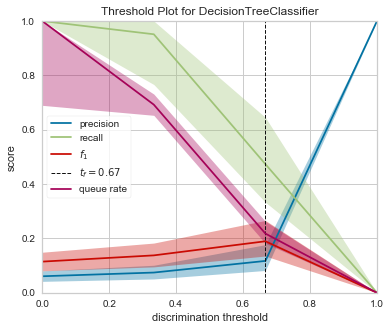

In [444]:
fig, ax = plt.subplots(figsize=(6,5))
roc_viz = DiscriminationThreshold(decision_tree)
roc_viz.fit(X_train,y_train)
roc_viz.poof()


In [445]:
dec_wcutoff = decision_tree.predict_proba(x_test)[:,1]
dec_wcutoff 

array([0.53562908, 0.53562908, 0.1617332 , ..., 0.38318994, 0.53562908,
       0.53562908])

In [446]:
trancut = np.where(dec_wcutoff > 0.67,1,0)
trancut

array([0, 0, 0, ..., 0, 0, 0])

In [447]:
fbeta_score(y_test,trancut, beta=2.0)

0.35791757049891537

In [448]:
confusion_matrix(y_test,trancut)

array([[1411,  396],
       [  49,   66]])

In [308]:
#do parameter tunining for decision trees



In [327]:
param_griddy = {
    'min_samples_split': [2,3,4],
    'max_depth': [10,25,30,35,36,40,45,50],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11]
    
}

In [328]:
hypa_search = GridSearchCV(estimator=decision_tree, param_grid=param_griddy,cv=strk,scoring=beta_score,verbose=2,n_jobs=-1)

In [329]:
hypa_search.fit(X_train,y_train)

Fitting 15 folds for each of 1584 candidates, totalling 23760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 2542 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 4806 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 7726 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 11286 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 15502 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 20358 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 23760 out of 23760 | elapsed:  3.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              preso...andom_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [330]:
hypa_search.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [331]:
hypa_search.best_score_

0.14186167779369185

In [332]:
dec_bestmodel = hypa_search.best_estimator_
dec_bestmodel

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [334]:
deypre = dec_bestmodel.predict_proba(x_test)[:,1]
deypre

array([0., 0., 0., ..., 0., 0., 0.])

In [346]:
cot_pr = np.where(deypre > 0.20,1,0)
cot_pr

array([0, 0, 0, ..., 0, 0, 0])

In [347]:
fbeta_score(y_test, cot_pr,beta=2)

0.15025041736227046

In [351]:
best_threshold = None
best_score = None
for threshold in np.arange(0.05, 1.0, 0.05):
    ypred = [0 if p <= threshold else 1 for p in deypre]
    score = fbeta_score(y_test, ypred, beta=2.0)
    print('threshold fbeta 2-score', threshold, score)
    
    if best_threshold == None:
        best_threshold, best_score = threshold, score
    elif best_threshold > score:
        best_threshold,best_score = threshold, score
        
    print('best Threshold, best fbeta score', best_threshold, best_score)

threshold fbeta 2-score 0.05 0.15025041736227046
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbeta 2-score 0.1 0.15025041736227046
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbeta 2-score 0.15000000000000002 0.15025041736227046
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbeta 2-score 0.2 0.15025041736227046
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbeta 2-score 0.25 0.15025041736227046
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbeta 2-score 0.3 0.15025041736227046
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbeta 2-score 0.35000000000000003 0.1505016722408027
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbeta 2-score 0.4 0.1505016722408027
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbeta 2-score 0.45 0.1505016722408027
best Threshold, best fbeta score 0.05 0.15025041736227046
threshold fbet

In [353]:
boo = np.where(deypre > best_threshold,1,0 )
boo

array([0, 0, 0, ..., 0, 0, 0])

In [354]:
fbeta_score(y_test,boo,beta=2.0)

0.15025041736227046

In [355]:
naiv_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [356]:
soo = naiv_bayes.predict_proba(x_test)[:,1]
soo

array([1.        , 1.        , 1.        , ..., 1.        , 0.99990633,
       1.        ])

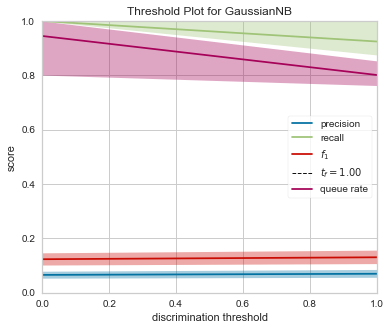

In [357]:
fig, ax = plt.subplots(figsize=(6,5))
roc_viz = DiscriminationThreshold(naiv_bayes)
roc_viz.fit(X_train,y_train)
roc_viz.poof()


In [367]:
duckpred = np.where(soo > 0.27,1,0)
duckpred

array([1, 1, 1, ..., 1, 1, 1])

In [368]:
fbeta_score(y_test,duckpred, beta=2.0)

0.2403628117913832

In [369]:
naiv_bayes.fit(X_train2,y_train2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [370]:
probapred = naiv_bayes.predict_proba(x_test2)[:,1]
probapred

array([0.99999998, 1.        , 0.99999998, ..., 1.        , 0.99999947,
       1.        ])

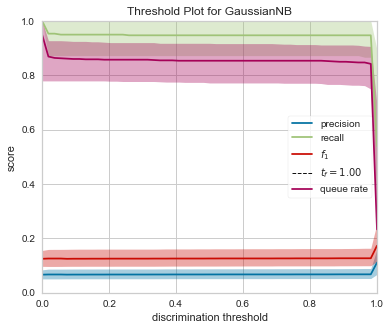

In [371]:
fig, ax = plt.subplots(figsize=(6,5))
roc_viz = DiscriminationThreshold(naiv_bayes)
roc_viz.fit(X_train2,y_train2)
roc_viz.poof()


In [372]:
precut = np.where(probapred > 0.98,1,0)
precut

array([1, 1, 1, ..., 1, 1, 1])

In [373]:
fbeta_score(y_test2, precut,beta=2.0)

0.256841094575132

In [374]:
naiv_bayes.fit(train_data2,policy_target2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [375]:
wholepred = naiv_bayes.predict_proba(test_data2)[:,1]
wholepred

array([1., 1., 1., ..., 1., 1., 1.])

In [376]:
uploady = np.where(wholepred > 0.98,1,0)
uploady

array([1, 1, 1, ..., 1, 1, 1])

In [377]:
#pd.DataFrame(uploady).to_csv('finalattempt.csv', index=False)

In [449]:
decision_tree.fit(train_data2,policy_target2)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [450]:
preddy_proba = decision_tree.predict_proba(test_data2)[:,1]
preddy_proba


array([0.16126697, 0.74158503, 0.74158503, ..., 0.74158503, 0.52299496,
       0.38187282])

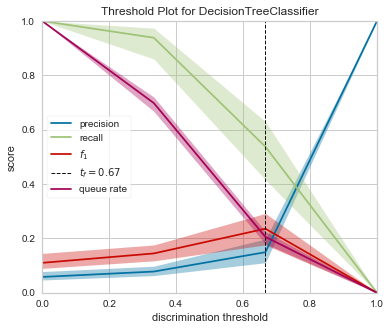

In [451]:
fig, ax = plt.subplots(figsize=(6,5))
roc_viz = DiscriminationThreshold(decision_tree)
roc_viz.fit(train_data2,policy_target2)
roc_viz.poof()


In [452]:
grty = np.where(preddy_proba > 0.67,1,0)
grty

array([0, 1, 1, ..., 1, 0, 0])

In [453]:
pd.DataFrame(grty).to_csv('final_attempt.csv', index= False)